<a href="https://colab.research.google.com/github/NoorMemonzz/Dynamic-Email-Generator-Python/blob/main/Copy_of_Readability_and_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import file


from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses.csv')
print(df.head())

Saving cleaned_ai_responses.csv to cleaned_ai_responses.csv
                                         AI Response      Source language  \
0  university admissions are open apply now and s...  ChatGPT 4o       en   
1  ready to take the next step university admissi...  ChatGPT 4o       en   
2  its time university admissions are open apply ...  ChatGPT 4o       en   
3  the wait is over apply now for university admi...  ChatGPT 4o       en   
4  university admissions are open take the next s...  ChatGPT 4o       en   

                                 Cleaned AI Response  
0  university admissions are open apply now and s...  
1  ready to take the next step university admissi...  
2  its time university admissions are open apply ...  
3  the wait is over apply now for university admi...  
4  university admissions are open take the next s...  


In [ ]:
#Install package for Flesch Kincaid and Gunning Fog INdex

!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import textstat

# Sample data: Assuming 'df' has columns 'AI Response' and 'Source'
# You can replace the following with loading your actual DataFrame
# df = pd.read_csv('your_file.csv')

# Example: Calculate Flesch-Kincaid and Gunning Fog scores
def get_flesch_kincaid(text):
    return textstat.flesch_kincaid_grade(text)

def get_gunning_fog(text):
    return textstat.gunning_fog(text)

# Apply these functions to the 'AI Response' column
df['Flesch_Kincaid'] = df['AI Response'].apply(get_flesch_kincaid)
df['Gunning_Fog'] = df['AI Response'].apply(get_gunning_fog)

# Group by 'Source' (AI channel) and calculate average readability scores
readability_by_source = df.groupby('Source')[['Flesch_Kincaid', 'Gunning_Fog']].mean()

# Display the results
print(readability_by_source)

            Flesch_Kincaid  Gunning_Fog
Source                                 
ChatGPT 4o       13.128514    16.068785
Claude           13.167245    15.994765
Gemini           13.064803    15.366661
Jasper           12.678995    16.488767
Pi               16.129245    19.121635


In [ ]:
#Explanation on both measures -- The Flesch-Kincaid score tells you the grade level required to understand the text. Lower scores are better for readability, meaning easier-to-read content.
#the Gunning Fog Index measures the complexity of the text, with higher values indicating harder-to-read text.

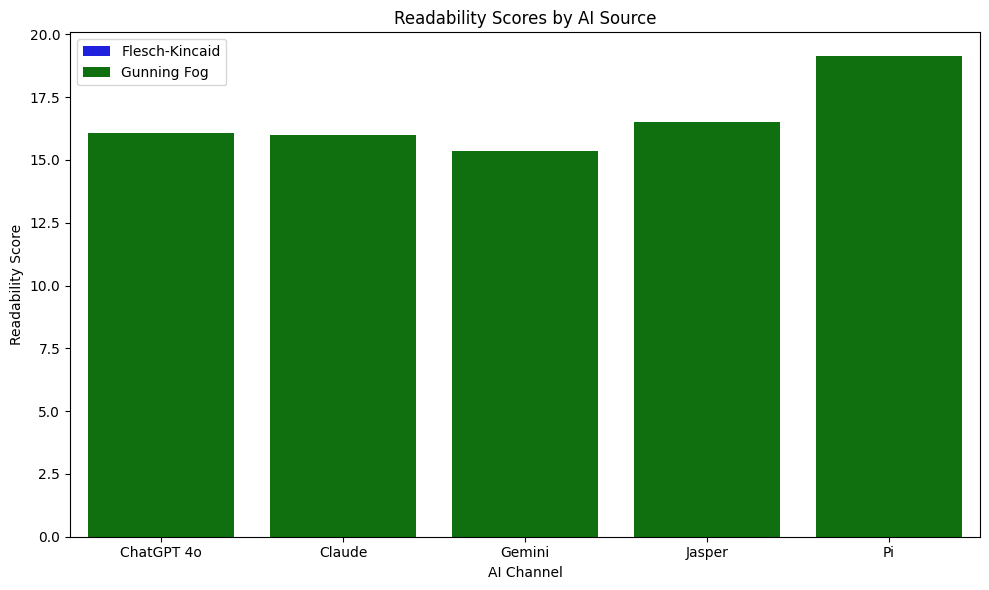

In [ ]:
#Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for easy plotting
readability_by_source = readability_by_source.reset_index()

# Plotting Flesch-Kincaid and Gunning Fog scores by AI source
plt.figure(figsize=(10, 6))
sns.barplot(data=readability_by_source, x='Source', y='Flesch_Kincaid', color='blue', label='Flesch-Kincaid')
sns.barplot(data=readability_by_source, x='Source', y='Gunning_Fog', color='green', label='Gunning Fog')

plt.title('Readability Scores by AI Source')
plt.xlabel('AI Channel')
plt.ylabel('Readability Score')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Flesch-Kincaid Score:

#Pi has the highest Flesch-Kincaid score (16.13), meaning its content is the most complex and would require a higher level of education (about 16th grade level, which is around college level or higher).
#Jasper has the lowest Flesch-Kincaid score (12.68), which suggests its content is relatively easier to read compared to the others, likely at a grade level just below high school (approximately 12th grade).

In [ ]:
#Gunning Fog
#Pi again has the highest Gunning Fog score (19.12), which makes its content the most difficult to read. Text with a Gunning Fog score of 19 is considered highly complex and may be harder to understand for a general audience.
#Gemini has the lowest Gunning Fog score (15.37), meaning its content is somewhat easier to read than the others, though still above the recommended threshold for general accessibility (usually 12 or lower).

In [ ]:
#Which channel is easy to read?
#Jasper is the easiest to read based on both the Flesch-Kincaid (12.68) and Gunning Fog (16.49) scores. Its content is the least complex and should be easier for a wider audience to engage with.

In [ ]:
#Which channel is hardest to read
#Pi is the hardest to read based on both the Flesch-Kincaid (16.13) and Gunning Fog (19.12) scores. Its content is the most complex and could be challenging for many readers to comprehend, which could limit engagement.

In [ ]:
#Recommendations: f the goal is wider audience engagement, Jasper and Gemini would be more effective in terms of readability, and you might want to focus on these channels for social media or marketing posts.#if the goal is to target a niche or specialized audience, Pi might be appropriate despite its more difficult readability, as it might be tailored to more knowledgeable readers.




In [ ]:
#Comparing Chatgpt and Gemini
#Gemini is marginally easier to read than ChatGPT based on both the Flesch-Kincaid and Gunning Fog scores.
#The difference is small enough that, for practical purposes, both can be considered similarly complex for a general audience, but Gemini may have a slight edge in terms of accessibility.